## <span style="color:blue">  Numerical exercises 7</span>

Come nel caso del Mlecular Dynamics si vuole studiare mediante simulazioni Monte Carlo un fluido classico all'equilibrio termico alla temperatura $T=1/k_B\beta$. Come nel nell'esercitazione $4$ si considera un'interazione a due corpi tra le particelle del fluido utlizzando un potenziale di Lennard-Jones:$$v(\vec r)=4\epsilon\bigg[\bigg(\frac{\sigma}{r}\bigg)^{12}-\bigg(\frac{\sigma}{r}\bigg)^{6}\bigg]$$
per un sistema di densità fissata $\rho$ in una regione cubica di volume $V=L^3$ con condizioni al contorno periodiche. All'equilibrio termico la densità di probabilità configurazionale è data, utilizzando l'ensemble canonico, da:$$p(\vec r)=\frac{e^{-\beta v(\vec r)}}{Q_N(V,T)}.$$
E' quindi utilizzabile l'algoritmo di Metropolis per campionare la distribuzioned di probabilità $p(\vec r)$. <p>
    Partendo, pertanto da una configurazione iniziale, si propone uno spostamento random di una delle particelle, e si acetta o si rifiuta la mossa considerando il rapporto $\frac{p(\vec r_{old})}{p(\vec r_{new}}$. Iterando il procedimento per un certo numero di Steps Monte Carlo si effettuano le misure di $U/N$ e $P$ sul fluido, valutandone le proprietà medie. Una proprietà che può essere calcolata mediante Monte Carlo è la funzione di distribuzion radiale a due corpi $g(r)$ (per un fluido omogeneo), definita come la probabilità che due particelle si trovino ad una certa distanza $r$:$$g(r)=\frac{\rho^{(2)}(r)}{\rho^2}.$$<n>
    Quindi dato che:$$\int_{r\leq|\vec r-\vec r'|\leq r+\Delta r}d\vec rd\vec r' \rho^{(2)}(\vec r,\vec r')\simeq g(r)\frac{4\pi\rho N}{3}((r+\Delta r)^3-r^3)$$ dove definiamo $\Delta V(r)=\frac{4\pi}{3}((r+\Delta r)^3-r^3)$
    e quindi si ottiene che $$g(r)=\frac{1}{\rho N\Delta V(r)}\bigg \langle\sum_i\sum_{j\neq i}\delta[|\vec r|-|(\vec r_i-\vec r_j)|]\bigg\rangle $$<p>
        In una simulazione Monte Carlo, essa, quindi,può essere ottenuta semplicemente registrando le occorenze della distanza tra particelle differenti in bins, quindi costruendo un Istogramma.

### Exercise 07

Use the Monte Carlo NVT code we have provided to print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations (of  $M=10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to obtain the Monte Carlo correlation time</span> via a fit with an exponential function. This will suggest you how large should be the blocks in your simulations.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

L'algortimo di Metropolis, essendo una catena d Markov, produce dei passi che non sono statisticamente indipendenti ovvero sono autocorrelati. Il tempo di correlazione è definito come il tempo caratteristico con cui l'autorrelazione decade.<n>
      Per una catena di Markov data l'omogeneità la funzione di autocorrelazione è definita cme la covarianza tra due punti a distanza temporale $t=n-l$, ovvero:$$C_X(t)=Cov(x_n,x_n+l)=\langle x_n x_{n+l}\rangle-\langle x_n \rangle \langle x_{n+l}\rangle$$ che ci aspettiamo che, come accenato precedentemente, decada esponenzialmente:$$C(t)\simeq e^{-t/\tau}$$ 
    Se vogliamo campioni statisticamente indipendenti occorre quindi campionare per tempi maggiori del tempo di correlazione. Questo permette inoltre di stimare le dimensioni dei blocchi con cui eseguire il data blocking. Se infatti i blocchi sono abbastanza grandi (molti tempi di autocorrelazione), si può supporre valido il Teorema del Limite Centrale  e interpretare ogni stima di blocco come un random variabile normale e quindi di potr stimare in questo modo l'incertezza statistica.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import os
import pickle
from scipy import optimize
import matplotlib.gridspec as gridspec

def exponential(x, a, b, c):
  return a * np.exp(-b * x) + c


#solido
pkl_file = open('Es7.01/Data/ACorrel_solid.pkl', 'rb')

Step,Ene_s,Pres_s,corr_u_s,corr_p_s,n_step = pickle.load(pkl_file)

pkl_file.close()
  
params_u_s, params_covariance_u_s = optimize.curve_fit(exponential, n_step[0 : 1000], corr_u_s[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione energia solido = ",  1/(params_u_s[1]))


params_p_s, params_covariance_p_s = optimize.curve_fit(exponential, n_step[0 : 1000], corr_p_s[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione pressione solido",  1/(params_p_s[1]))




Tempo di correlazione energia solido =  9.082319616356514
Tempo di correlazione pressione solido 8.881656135293705


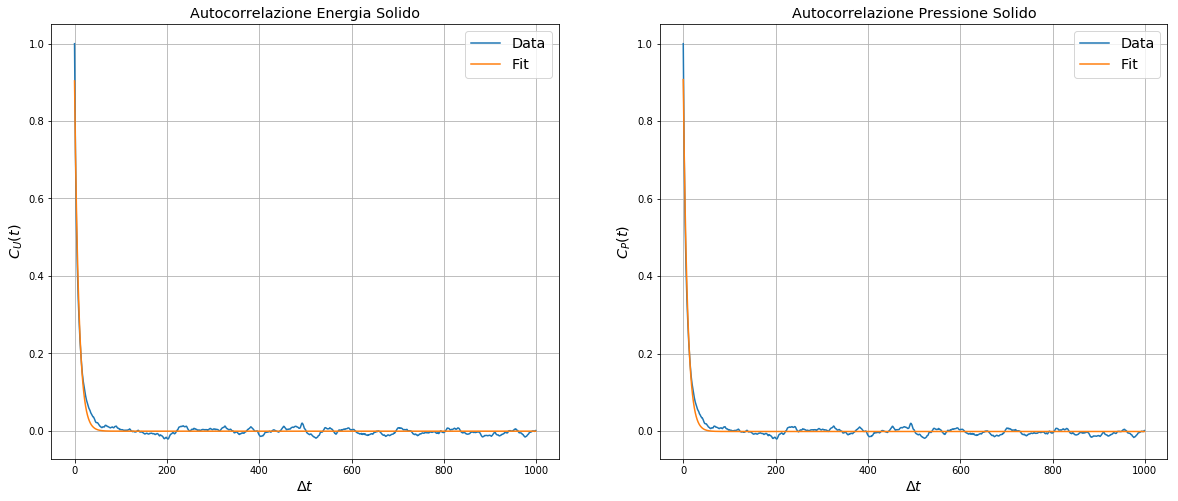

In [2]:
G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,8))
f.subplots_adjust(hspace=0.4, wspace=0.2)

fig_1=plt.subplot(G[0, 0])
fig_1.plot(n_step,corr_u_s,label="Data")
fig_1.plot(n_step,exponential(n_step,params_u_s[0],params_u_s[1],params_u_s[2]),label="Fit")
fig_1.set_title('Autocorrelazione Energia Solido',fontsize='x-large')
fig_1.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_1.set_ylabel(r'$C_{U}(t)$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.plot(n_step,corr_p_s,label="Data")
fig_2.plot(n_step,exponential(n_step,params_p_s[0],params_p_s[1],params_p_s[2]),label="Fit")
fig_2.set_title('Autocorrelazione Pressione Solido',fontsize='x-large')
fig_2.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_2.set_ylabel(r'$C_P(t)$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)

In [3]:
#liquido
pkl_file1 = open('Es7.01/Data/ACorrel_liquid.pkl', 'rb')

Step,Ene_l,Pres_l,corr_u_l,corr_p_l,n_step = pickle.load(pkl_file1)

pkl_file1.close()
  
params_u_l, params_covariance_u_l = optimize.curve_fit(exponential, n_step[0 : 1000], corr_u_l[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione energia liquido",1/(params_u_l[1]))


params_p_l, params_covariance_p_l = optimize.curve_fit(exponential, n_step[0 : 1000], corr_p_s[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione pressione liquido",1/(params_p_l[1]))

Tempo di correlazione energia liquido 16.377118885803775
Tempo di correlazione pressione liquido 8.881656135293705


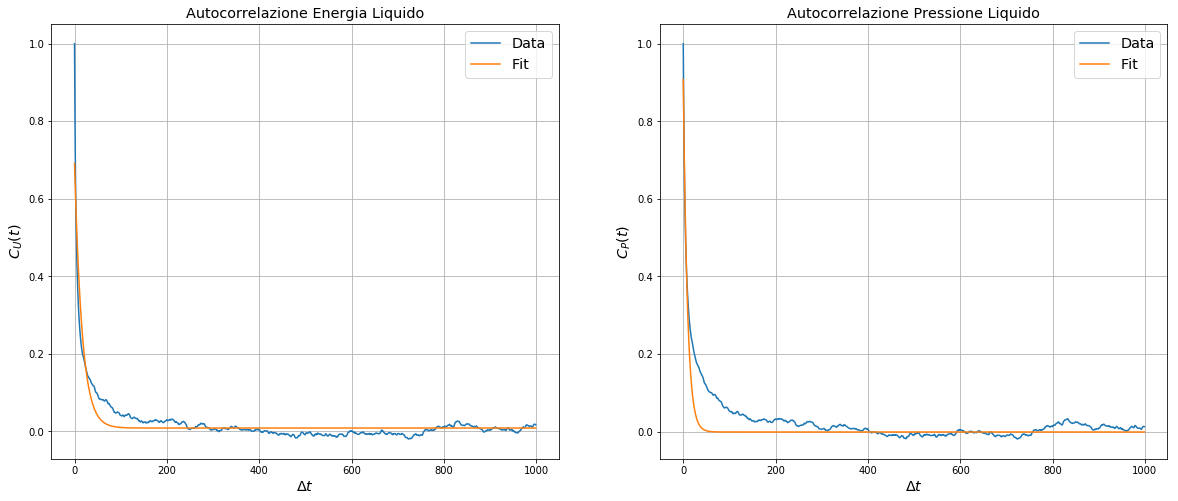

In [4]:
G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,8))
f.subplots_adjust(hspace=0.4, wspace=0.2)

fig_3=plt.subplot(G[0, 0])
fig_3.plot(n_step,corr_u_l,label="Data")
fig_3.plot(n_step,exponential(n_step,params_u_l[0],params_u_l[1],params_u_l[2]),label="Fit")
fig_3.set_title('Autocorrelazione Energia Liquido',fontsize='x-large')
fig_3.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_3.set_ylabel(r'$C_{U}(t)$',fontsize='x-large')
fig_3.legend(fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[0, 1])
fig_4.plot(n_step,corr_p_l,label="Data")
fig_4.plot(n_step,exponential(n_step,params_p_l[0],params_p_l[1],params_p_l[2]),label="Fit")
fig_4.set_title('Autocorrelazione Pressione Liquido',fontsize='x-large')
fig_4.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_4.set_ylabel(r'$C_P(t)$',fontsize='x-large')
fig_4.legend(fontsize='x-large')
fig_4.grid(True)

In [5]:
#gassoso
pkl_file = open('Es7.01/Data/ACorrel_gas.pkl', 'rb')

Step,Ene_g,Pres_g,corr_u_g,corr_p_g,n_step = pickle.load(pkl_file)

pkl_file.close()
  
params_u_g, params_covariance_u_g = optimize.curve_fit(exponential, n_step[0 : 1000], corr_u_g[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione energia gas",1/(params_u_g[1]))


params_p_g, params_covariance_p_g = optimize.curve_fit(exponential, n_step[0 : 1000], corr_p_g[0:1000],p0=[1.,0.01,0.])
print("Tempo di correlazione pressione gas",1/(params_p_g[1]))


Tempo di correlazione energia gas 2.941468144779545
Tempo di correlazione pressione gas 0.8573740846331149


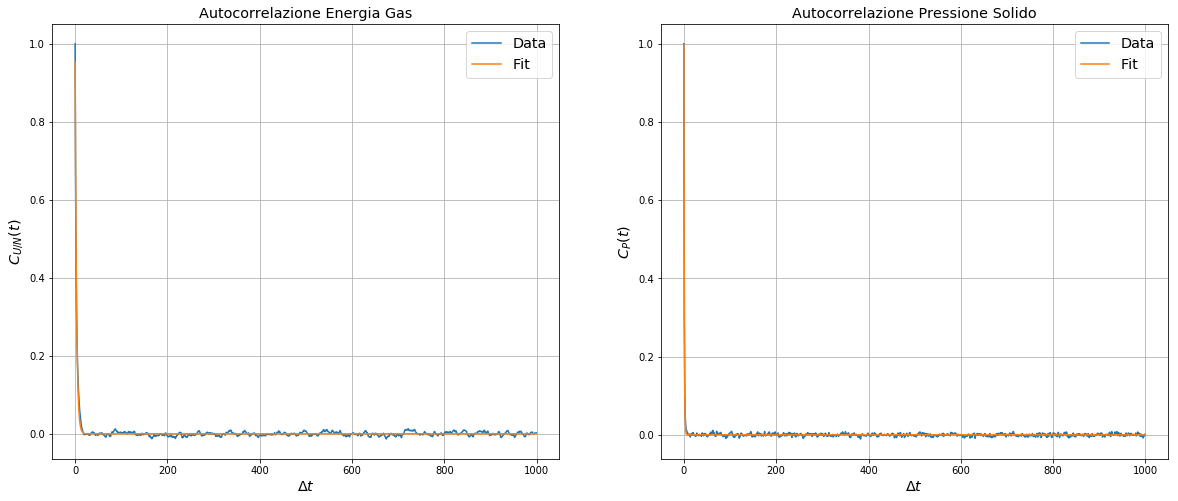

In [6]:
G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(20,8))
f.subplots_adjust(hspace=0.4, wspace=0.2)

fig_5=plt.subplot(G[0, 0])
fig_5.plot(n_step,corr_u_g,label="Data")
fig_5.plot(n_step,exponential(n_step,params_u_g[0],params_u_g[1],params_u_g[2]),label="Fit")
fig_5.set_title('Autocorrelazione Energia Gas',fontsize='x-large')
fig_5.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_5.set_ylabel(r'$C_{U/N}(t)$',fontsize='x-large')
fig_5.legend(fontsize='x-large')
fig_5.grid(True)

fig_6=plt.subplot(G[0, 1])
fig_6.plot(n_step,corr_p_g,label="Data")
fig_6.plot(n_step,exponential(n_step,params_p_g[0],params_p_g[1],params_p_g[2]),label="Fit")
fig_6.set_title('Autocorrelazione Pressione Solido',fontsize='x-large')
fig_6.set_xlabel(r'$\Delta t$',fontsize='x-large')
fig_6.set_ylabel(r'$C_P(t)$',fontsize='x-large')
fig_6.legend(fontsize='x-large')
fig_6.grid(True)           
            
            
            
plt.show()            


Sulle funzioni di correlazione si sono eseguiti dei fit esponenziali con tre parametri:$$y_{fit}=ae^{-b\Delta t}+c$$ dove $\Delta t$ nel caso in esame non è altro che la distanza tra due mosse Monte Carlo. Si nota come i fit effettuati siano affidabili nel caso del solido e in particolare del gas mentre invece non si ha una buona convergenza nel caso del liquido. Inoltre si nota come nel caso del gas il sistema tende a diventare subito scorrelato.

In [7]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV**2)/n)


def Media_blk(Step,x):
  n_throws=len(Step)
  sum_prog=0
  su2_prog=0

  L=np.arange(0,5100,100,dtype=int)
  L[0]=10

  n_blk=np.zeros(len(L),dtype=int)
  x_blk=np.zeros(len(L))
  x_err=np.zeros(len(L))

  for t in range(len(L)):
    n_blk[t]=int(n_throws/L[t])
    sum_prog=0
    su2_prog=0
    for i in range(n_blk[t]):
      sum = 0
      for j in range (L[t]):
        k = j+i*L[t]
        sum += x[k]
      sum_prog +=sum/L[t]
      su2_prog +=(sum/L[t])**2
    
    sum_prog/=(n_blk[t])
    su2_prog/=(n_blk[t])

    x_blk[t]=sum_prog
    x_err[t]=error(sum_prog,su2_prog,i)
  return L, x_blk, x_err


L,Ene_blk_s,Ene_err_s = Media_blk(Step,Ene_s)
L,Pres_blk_s,Pres_err_s = Media_blk(Step,Ene_s)

L,Ene_blk_l,Ene_err_l = Media_blk(Step,Ene_l)
L,Pres_blk_l,Pres_err_l = Media_blk(Step,Ene_l)

L,Ene_blk_g,Ene_err_g = Media_blk(Step,Ene_g)
L,Pres_blk_g,Pres_err_g = Media_blk(Step,Pres_g)



L = [  10  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300
 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700
 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100
 4200 4300 4400 4500 4600 4700 4800 4900 5000]


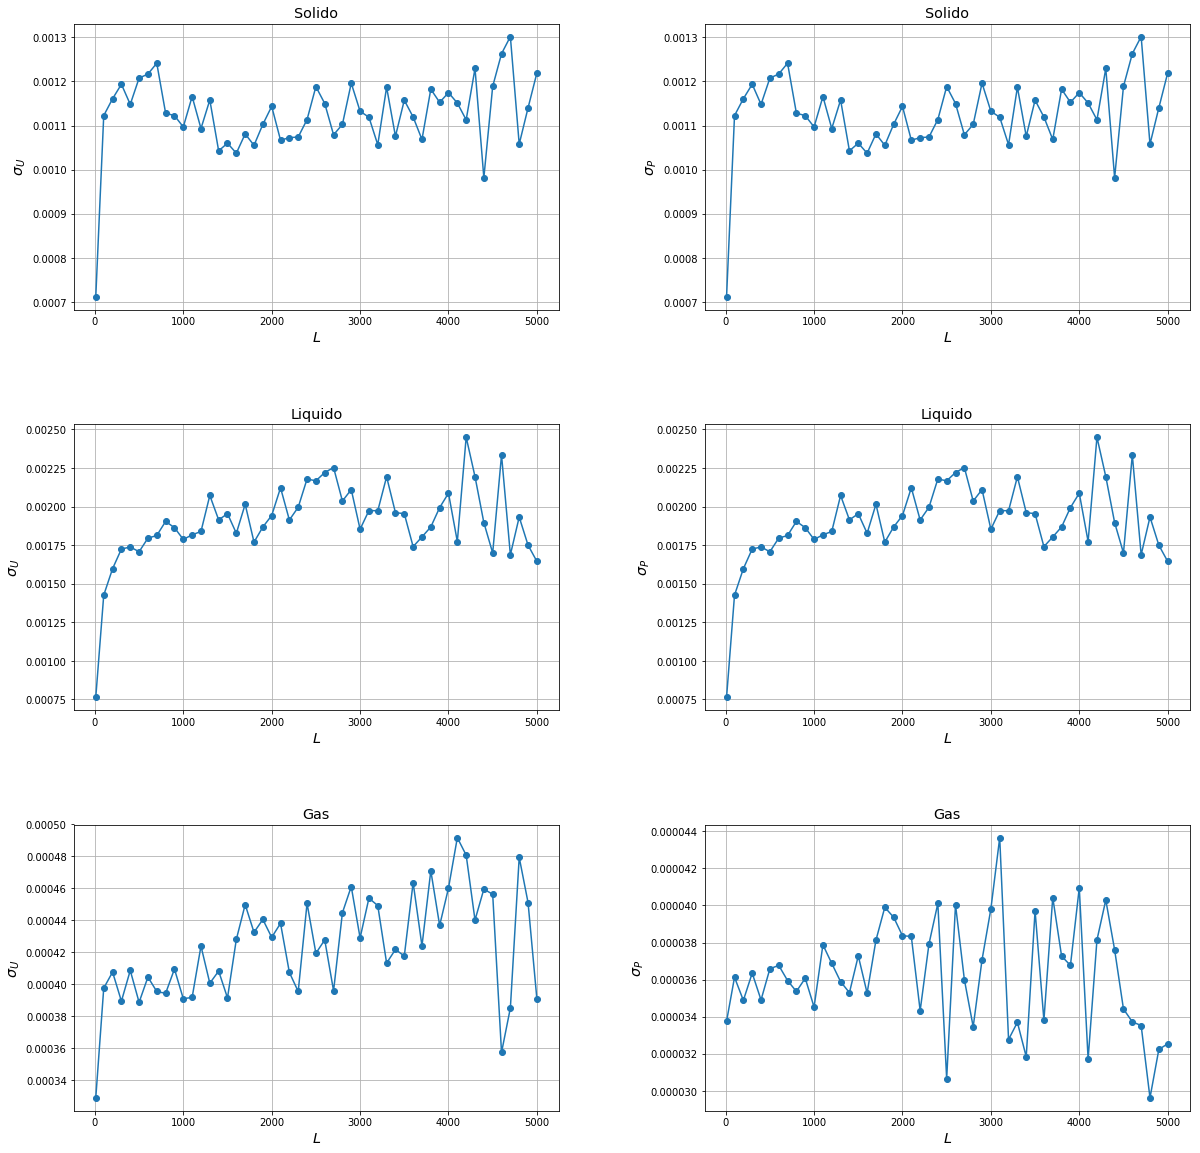

In [8]:

G = gridspec.GridSpec(3,2)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.3)

fig_1=plt.subplot(G[0, 0])
fig_1.plot(L,Ene_err_s,label="Data",marker='o')
fig_1.set_title('Solido',fontsize='x-large')
fig_1.set_xlabel(r'$L$',fontsize='x-large')
fig_1.set_ylabel(r'$\sigma_{U}$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.plot(L,Pres_err_s,label="Data",marker='o')
fig_2.set_title('Solido',fontsize='x-large')
fig_2.set_xlabel(r'$L$',fontsize='x-large')
fig_2.set_ylabel(r'$\sigma_{P}$',fontsize='x-large')
fig_2.grid(True)

fig_3=plt.subplot(G[1, 0])
fig_3.plot(L,Ene_err_l,label="Data",marker='o')
fig_3.set_title('Liquido',fontsize='x-large')
fig_3.set_xlabel(r'$L$',fontsize='x-large')
fig_3.set_ylabel(r'$\sigma_{U}$',fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[1, 1])
fig_4.plot(L,Pres_err_l,label="Data",marker='o')
fig_4.set_title('Liquido',fontsize='x-large')
fig_4.set_xlabel(r'$L$',fontsize='x-large')
fig_4.set_ylabel(r'$\sigma_{P}$',fontsize='x-large')
fig_4.grid(True)


fig_5=plt.subplot(G[2, 0])
fig_5.plot(L,Ene_err_g,label="Data",marker='o')
fig_5.set_title('Gas',fontsize='x-large')
fig_5.set_xlabel(r'$L$',fontsize='x-large')
fig_5.set_ylabel(r'$\sigma_{U}$',fontsize='x-large')
fig_5.grid(True)

fig_6=plt.subplot(G[2, 1])
fig_6.plot(L,Pres_err_g,label="Data",marker='o')
fig_6.set_title('Gas',fontsize='x-large')
fig_6.set_xlabel(r'$L$',fontsize='x-large')
fig_6.set_ylabel(r'$\sigma_{P}$',fontsize='x-large')
fig_6.grid(True)          

print("L =",L)
            
            
plt.show()            


Dai grafici della deviazione standard in funzione della block size $L$, l'errore tende a crescere fino  diventare costante e indipendente dalla block size. Quindi tenendo in considerazione anche i tempi di correlazione dapprima calcolati, per dati correlati vi è una sottostima dell'errore che poi invece aumenta per poi diventare costante una volta che le varibili sono scorrelate. <p>
    Quindi per avere blocchi scorrelati e quindi per non sottostimare l'errore statistico si impone che la dimensione del blocco deve essere di molti tempi di correlazione.

### Exercise 07.1

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) and Krypton ($\sigma = 0.364$ nm, $\epsilon/k_B = 164$ K, $m=83.798$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

<span style="color:red">show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [9]:
x1s,Epot_s, dev_Epot_s = np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.epot_solid.0", usecols=(0,2,3), unpack='true')
x2s,Pres_s, dev_Pres_s= np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.pres_solid.0", usecols=(0,2,3), unpack='true')


x1l,Epot_l, dev_Epot_l = np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.epot_liquid.0", usecols=(0,2,3), unpack='true')
x2l,Pres_l, dev_Pres_l= np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.pres_liquid.0", usecols=(0,2,3), unpack='true')

x1g,Epot_g, dev_Epot_g = np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.epot_gas.0", usecols=(0,2,3), unpack='true')
x2g,Pres_g, dev_Pres_g= np.loadtxt("Es7.02/Monte_Carlo_NVT/Output/output.pres_gas.0", usecols=(0,2,3), unpack='true')




In [10]:
sigma=0.34*(10**-9)
e_kb=120.
eps=120.*1.380649*(10**-23)

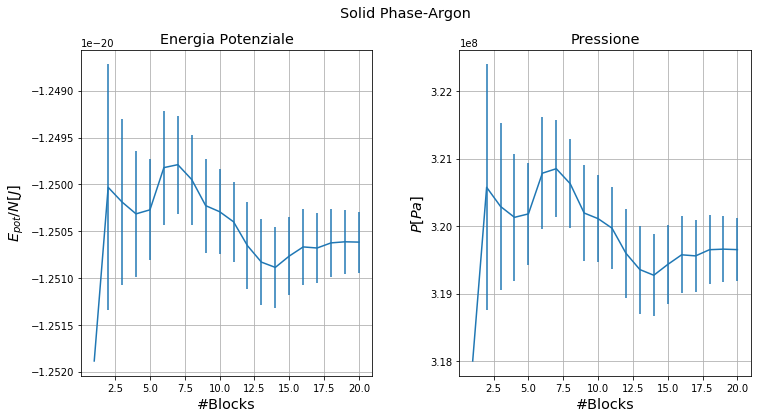

In [11]:
G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.3)
f.suptitle('Solid Phase-Argon',fontsize='x-large')

fig_1=plt.subplot(G[0, 0])
fig_1.errorbar(x1s,Epot_s*eps,yerr=dev_Epot_s*eps,label="E_pot")
fig_1.set_title('Energia Potenziale',fontsize='x-large')
fig_1.set_xlabel('#Blocks',fontsize='x-large')
fig_1.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.errorbar(x2s,Pres_s*eps/(sigma**3),yerr=dev_Pres_s*eps/(sigma**3),label="Pres")
fig_2.set_title('Pressione',fontsize='x-large')
fig_2.set_xlabel('#Blocks',fontsize='x-large')
fig_2.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_2.grid(True)

plt.show()

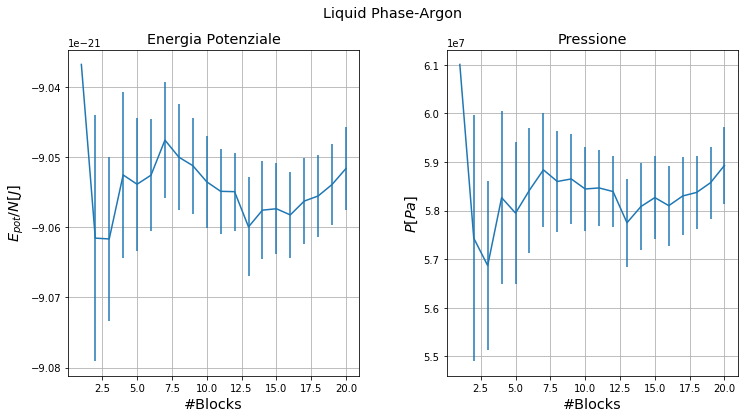

In [12]:
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.3)
f.suptitle('Liquid Phase-Argon',fontsize='x-large')

fig_3=plt.subplot(G[0, 0])
fig_3.errorbar(x1l,Epot_l*eps,yerr=dev_Epot_l*eps,label="E_pot")
fig_3.set_title('Energia Potenziale',fontsize='x-large')
fig_3.set_xlabel('#Blocks',fontsize='x-large')
fig_3.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[0, 1])
fig_4.errorbar(x2l,Pres_l*eps/(sigma**3),yerr=dev_Pres_l*eps/(sigma**3),label="Pres")
fig_4.set_title('Pressione',fontsize='x-large')
fig_4.set_xlabel('#Blocks',fontsize='x-large')
fig_4.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_4.grid(True)

plt.show()

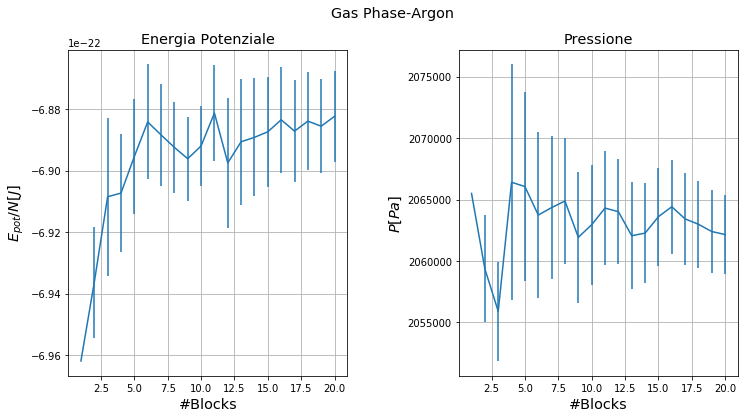

In [13]:
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.suptitle('Gas Phase-Argon',fontsize='x-large')

fig_5=plt.subplot(G[0, 0])
fig_5.errorbar(x1g,Epot_g*eps,yerr=dev_Epot_g*eps,label="E_pot")
fig_5.set_title('Energia Potenziale',fontsize='x-large')
fig_5.set_xlabel('#Blocks',fontsize='x-large')
fig_5.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_5.grid(True)

fig_6=plt.subplot(G[0, 1])
fig_6.errorbar(x2g,Pres_g*eps/(sigma**3),yerr=dev_Pres_g*eps/(sigma**3),label="Pres")
fig_6.set_title('Pressione',fontsize='x-large')
fig_6.set_xlabel('#Blocks',fontsize='x-large')
fig_6.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_6.grid(True)
plt.show()


In [14]:
sigma=0.364*(10**-9)
e_kb=164.
eps=164.*1.380649*(10**-23)

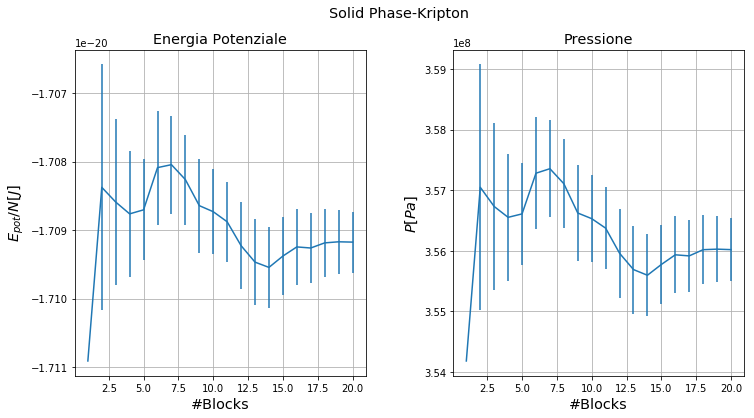

In [15]:
G = gridspec.GridSpec(1,2)
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.3)
f.suptitle('Solid Phase-Kripton',fontsize='x-large')

fig_1=plt.subplot(G[0, 0])
fig_1.errorbar(x1s,Epot_s*eps,yerr=dev_Epot_s*eps,label="E_pot")
fig_1.set_title('Energia Potenziale',fontsize='x-large')
fig_1.set_xlabel('#Blocks',fontsize='x-large')
fig_1.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.errorbar(x2s,Pres_s*eps/(sigma**3),yerr=dev_Pres_s*eps/(sigma**3),label="Pres")
fig_2.set_title('Pressione',fontsize='x-large')
fig_2.set_xlabel('#Blocks',fontsize='x-large')
fig_2.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_2.grid(True)

plt.show()

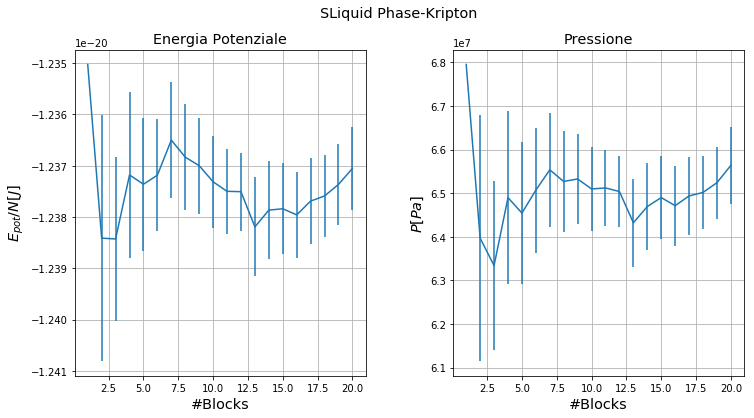

In [16]:
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.3)
f.suptitle('SLiquid Phase-Kripton',fontsize='x-large')

fig_3=plt.subplot(G[0, 0])
fig_3.errorbar(x1l,Epot_l*eps,yerr=dev_Epot_l*eps,label="E_pot")
fig_3.set_title('Energia Potenziale',fontsize='x-large')
fig_3.set_xlabel('#Blocks',fontsize='x-large')
fig_3.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[0, 1])
fig_4.errorbar(x2l,Pres_l*eps/(sigma**3),yerr=dev_Pres_l*eps/(sigma**3),label="Pres")
fig_4.set_title('Pressione',fontsize='x-large')
fig_4.set_xlabel('#Blocks',fontsize='x-large')
fig_4.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_4.grid(True)

plt.show()

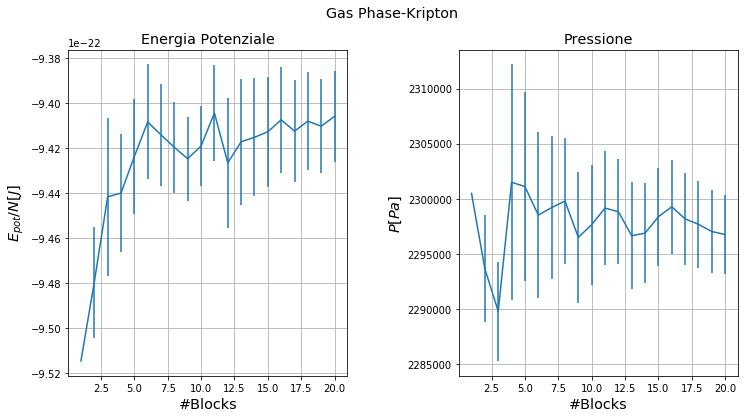

In [17]:
f = plt.figure(figsize=(12,6))
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.suptitle('Gas Phase-Kripton',fontsize='x-large')

fig_5=plt.subplot(G[0, 0])
fig_5.errorbar(x1g,Epot_g*eps,yerr=dev_Epot_g*eps,label="E_pot")
fig_5.set_title('Energia Potenziale',fontsize='x-large')
fig_5.set_xlabel('#Blocks',fontsize='x-large')
fig_5.set_ylabel(r'$E_{pot}/N [J]$',fontsize='x-large')
fig_5.grid(True)

fig_6=plt.subplot(G[0, 1])
fig_6.errorbar(x2g,Pres_g*eps/(sigma**3),yerr=dev_Pres_g*eps/(sigma**3),label="Pres")
fig_6.set_title('Pressione',fontsize='x-large')
fig_6.set_xlabel('#Blocks',fontsize='x-large')
fig_6.set_ylabel(r'$P [Pa]$',fontsize='x-large')
fig_6.grid(True)
plt.show()


Di seguito sono riportati i grafici per la funzione di distribuzione radiale ricavata mediante Monte Carlo e Molecular Dynamics.


In [18]:
bin_solid_mon, mean_solid_mon, error_solid_mon = np.loadtxt("Es7.02/Monte_Carlo_NVT/Gofr/output.gave_solid.0", usecols=(0,1,2), delimiter='\t', unpack='true')
bin_liquid_mon, mean_liquid_mon, error_liquid_mon = np.loadtxt("Es7.02/Monte_Carlo_NVT/Gofr/output.gave_liquid.0", usecols=(0,1,2), delimiter='\t', unpack='true')
bin_gas_mon, mean_gas_mon, error_gas_mon = np.loadtxt("Es7.02/Monte_Carlo_NVT/Gofr/output.gave_gas.0", usecols=(0,1,2), delimiter='\t', unpack='true')

bin_solid_mol, mean_solid_mol, error_solid_mol = np.loadtxt("Es4/Molecular_dynamics/Gofr/Gave_solid.out", usecols=(0,1,2), delimiter='\t', unpack='true')
bin_liquid_mol, mean_liquid_mol, error_liquid_mol = np.loadtxt("Es4/Molecular_dynamics/Gofr/Gave_liquid.out", usecols=(0,1,2), delimiter='\t', unpack='true')
bin_gas_mol, mean_gas_mol, error_gas_mol = np.loadtxt("Es4/Molecular_dynamics/Gofr/Gave_gas.out", usecols=(0,1,2), delimiter='\t', unpack='true')



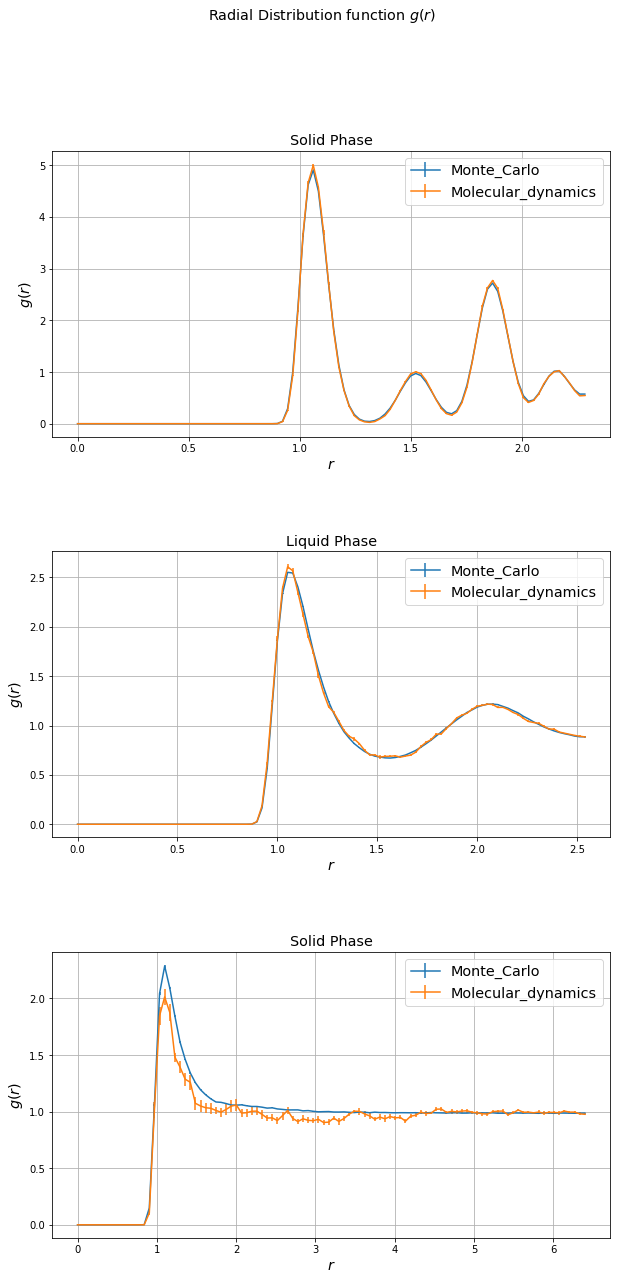

In [19]:
G = gridspec.GridSpec(3,1)
f = plt.figure(figsize=(10,20))
f.subplots_adjust(hspace=0.4, wspace=0.3)
f.suptitle('Radial Distribution function $g(r)$',fontsize='x-large')

fig_1=plt.subplot(G[0, 0])
fig_1.errorbar(bin_solid_mon,mean_solid_mon,yerr=error_solid_mon,label="Monte_Carlo")
fig_1.errorbar(bin_solid_mol,mean_solid_mol,yerr=error_solid_mol,label="Molecular_dynamics")
fig_1.set_title(r'Solid Phase',fontsize='x-large')
fig_1.set_xlabel(r'$r$',fontsize='x-large')
fig_1.set_ylabel(r'$g(r)$',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[1,0])
fig_2.errorbar(bin_liquid_mon,mean_liquid_mon,yerr=error_liquid_mon,label="Monte_Carlo")
fig_2.errorbar(bin_liquid_mol,mean_liquid_mol,yerr=error_liquid_mol,label="Molecular_dynamics")
fig_2.set_title(r'Liquid Phase',fontsize='x-large')
fig_2.set_xlabel(r'$r$',fontsize='x-large')
fig_2.set_ylabel(r'$g(r)$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)


fig_3=plt.subplot(G[2, 0])
fig_3.errorbar(bin_gas_mon,mean_gas_mon,yerr=error_gas_mon,label="Monte_Carlo")
fig_3.errorbar(bin_gas_mol,mean_gas_mol,yerr=error_gas_mol,label="Molecular_dynamics")
fig_3.set_title(r'Solid Phase',fontsize='x-large')
fig_3.set_xlabel(r'$r$',fontsize='x-large')
fig_3.set_ylabel(r'$g(r)$',fontsize='x-large')
fig_3.legend(fontsize='x-large')
fig_3.grid(True)

plt.show()

Per lo studio di proprietà di correlazione statiche simulazioni Monte Carlo sono migliori dato che in genere convergono più velocemente alla funzione di distribuzione da campionare e non si deve campionare l'intero spazio delle fasi come è invece necessario nei calcoli di Dinamica Molecolare, dato che non vi è bisogno di integrare sui momenti